In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as ma
from sympy import *

init_printing(use_unicode=True)

%matplotlib inline

In [2]:
k0, k1, a, b = symbols("k0 k1 a b")
print(latex(k0+ k1+ a+ b))

a + b + k_{0} + k_{1}


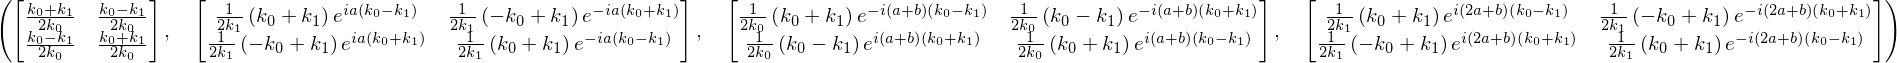

In [3]:
T1 = Matrix([[k0+k1,k0-k1],[k0-k1,k0+k1]])/(2*k0)
T2 = Matrix([[(k1+k0)*exp_polar(I*a*(k0-k1)), (k1-k0)*exp_polar(-I*a*(k0+k1))],\
             [(k1-k0)*exp_polar(I*a*(k0+k1)), (k1+k0)*exp_polar(-I*a*(k0-k1))]])/(2*k1)
T3 = Matrix([[(k0+k1)*exp_polar(-I*(a+b)*(k0-k1)), (k0-k1)*exp_polar(-I*(a+b)*(k0+k1))],\
             [(k0-k1)*exp_polar(I*(a+b)*(k0+k1)), (k0+k1)*exp_polar(I*(a+b)*(k0-k1))]])/(2*k0)
T4 = Matrix([[(k1+k0)*exp_polar(I*(2*a+b)*(k0-k1)), (k1-k0)*exp_polar(-I*(2*a+b)*(k0+k1))],\
             [(k1-k0)*exp_polar(I*(2*a+b)*(k0+k1)), (k1+k0)*exp_polar(-I*(2*a+b)*(k0-k1))]])/(2*k1)
T1, T2, T3, T4

In [4]:
T12 = T1*T2
T123 = T12*T3
Tfinal = T123*T4

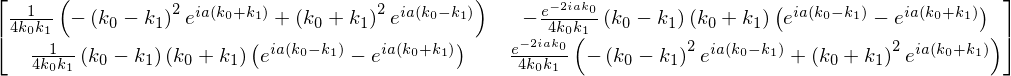

In [10]:
#Tfinal
T12_s = simplify(T12)
T12_s

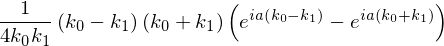

In [16]:
T12_s[2]

In [15]:
Tfinal_s = simplify(Tfinal)
Tfinal_s2 = simplify(Tfinal_s)
Current = Tfinal_s2*16*k0**2*k1**2

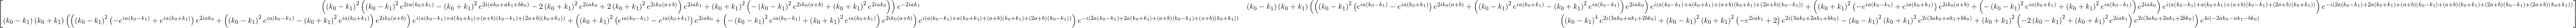

In [17]:
Current